In [140]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

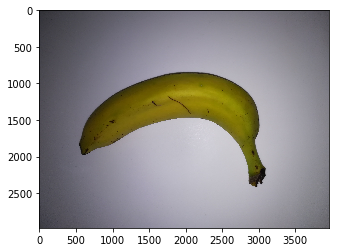

In [141]:
#read image
img = cv2.imread('../images_to_classify/IMG_20181119_225303.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[(0.0, 113046.0), (1.0, 81901.0), (2.0, 93840.0), (3.0, 92573.0), (4.0, 84752.0), (5.0, 83051.0)]


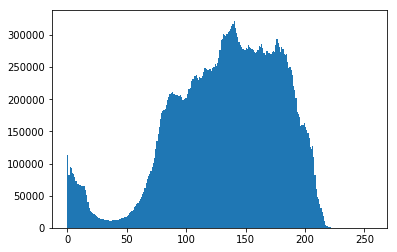

In [179]:
#show histogram to see which treshold we should select
hist = plt.hist(img.ravel(), 256, [0,256])
hist = np.asarray(hist)
len(hist[1])
newArray = []
for i in range(len(hist[0])):
    if hist[1][i] < 20 and hist[0][i] > 80000:
        newArray.append((hist[1][i],hist[0][i]))
print(newArray)
#len(hist[0])
#hist[1] = hist[1][1:]
#hist[1][hist[0] > 10000]

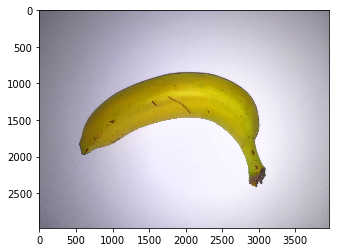

In [117]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

img = increase_brightness(img, 60)
plt.imshow(img)

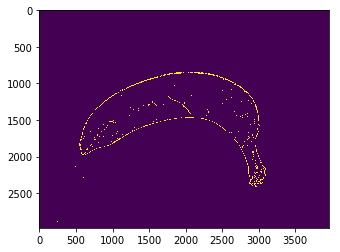

In [118]:
#converting image to graysclae to find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.adaptiveThreshold(gray, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

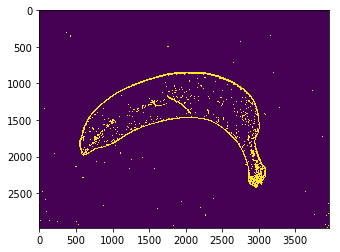

In [119]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(thresh, kernel)
plt.imshow(dilated)

In [120]:
_, cnts, _  = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

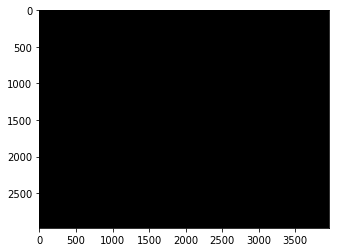

In [121]:
#insert fruit area of original image onto a new image with black background
mask = np.zeros_like(img)
plt.imshow(mask)


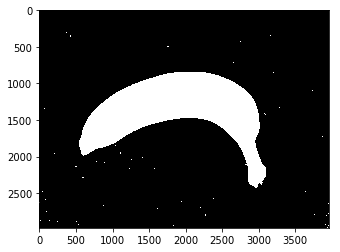

In [122]:
#insert fruit area of original image onto a new image with black background

#creating new black image same size as the original
out = np.zeros_like(img)

#selecting all the pixels from mask that are white and replace them with those same 
#pixels from the original image (that correspond to the pixels of the fruit)
cv2.fillPoly(mask, pts = cnts, color=(255,255,255))

#show the mask we created
plt.imshow(mask)

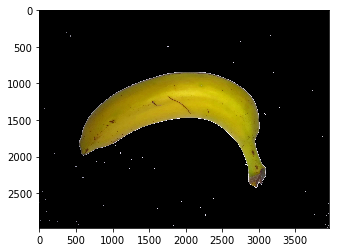

In [123]:
#put back all 3 color dimensions on the mask
img2 = img.copy()
mask[:,:,1] = mask[:,:,0]
mask[:,:,2] = mask[:,:,0]
img2[mask!=255] = 0
plt.imshow(img2)

In [124]:
#get all the rgb values for the mask
r = img2[:,:,0]
g = img2[:,:,1]
b = img2[:,:,2]

In [125]:
#filter all the rgb values for the mask to eliminate the ones that are 0 (black)
r = r[r!=0]
g = g[g!=0]
b = b[b!=0]

In [126]:
#find color by calculating the mean of each color component
[int(r.mean()), int(g.mean()), int(b.mean())]

[166, 147, 27]